In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../Base_de_datos.csv")
df.head()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [2]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10763 non-null  int64  
 1   fecha_prestamo                 10763 non-null  object 
 2   capital_prestado               10763 non-null  float64
 3   plazo_meses                    10763 non-null  int64  
 4   edad_cliente                   10763 non-null  int64  
 5   tipo_laboral                   10763 non-null  object 
 6   salario_cliente                10763 non-null  int64  
 7   total_otros_prestamos          10763 non-null  int64  
 8   cuota_pactada                  10763 non-null  int64  
 9   puntaje                        10763 non-null  float64
 10  puntaje_datacredito            10757 non-null  float64
 11  cant_creditosvigentes          10763 non-null  int64  
 12  huella_consulta                10763 non-null 

El dataset contiene principalmente variables numéricas, lo cual es favorable para el entrenamiento de modelos predictivos. Sin embargo, se identifican variables categóricas que deberán transformarse posteriormente mediante técnicas de codificación.

La variable tendencia_ingresos presenta un porcentaje alto de valores faltantes, lo que sugiere que podría requerir imputación, tratamiento especial o incluso eliminación dependiendo de su relevancia predictiva.

La variable fecha_prestamo debe transformarse a formato datetime para permitir la extracción de variables temporales relevantes como año, mes o día.

La variable Pago_atiempo representa la variable objetivo del modelo predictivo, indicando si el cliente cumplió o no con el pago.

In [11]:
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"])

In [13]:
df.describe()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,...,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,...,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,...,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000
std,2.338279,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,...,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668


se detectaron valores atípicos en la variable edad_cliente, específicamente edades superiores a 100 años(123 años), lo cual indica posibles errores de captura que deberán ser tratados en la etapa de limpieza.

Existe alta variabilidad en el capital prestado, lo que sugiere presencia de clientes con créditos de alto monto.

La variable salario_cliente presenta valores extremos (22.000.000.000) inconsistentes que sugieren errores de registro o unidades incorrectas.

Se identificaron valores negativos en la variable puntaje, lo cual indica anomalías que deberán corregirse o filtrarse antes del modelado.

La mayoría de clientes no presenta mora.

La variable objetivo presenta un fuerte desbalance de clases, con predominio de pagos a tiempo, lo que deberá considerarse durante el entrenamiento del modelo mediante técnicas de balanceo.

Las variables financieras presentan alta dispersión, lo que sugiere necesidad de escalamiento previo al entrenamiento del modelo.

In [4]:
df.isnull().sum().sort_values(ascending=False)

tendencia_ingresos               2932
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64

Estas variables presentan una proporción alta de datos faltantes, lo que podría afectar el rendimiento del modelo si no se tratan adecuadamente.

Las variables tendencia_ingresos y promedio_ingresos_datacredito presentan aproximadamente 27% de valores faltantes, por lo que se evaluará su relevancia predictiva antes de decidir su imputación o eliminación.

os valores faltantes en variables financieras son manejables y pueden tratarse mediante técnicas de imputación como media, mediana o modelos predictivos.

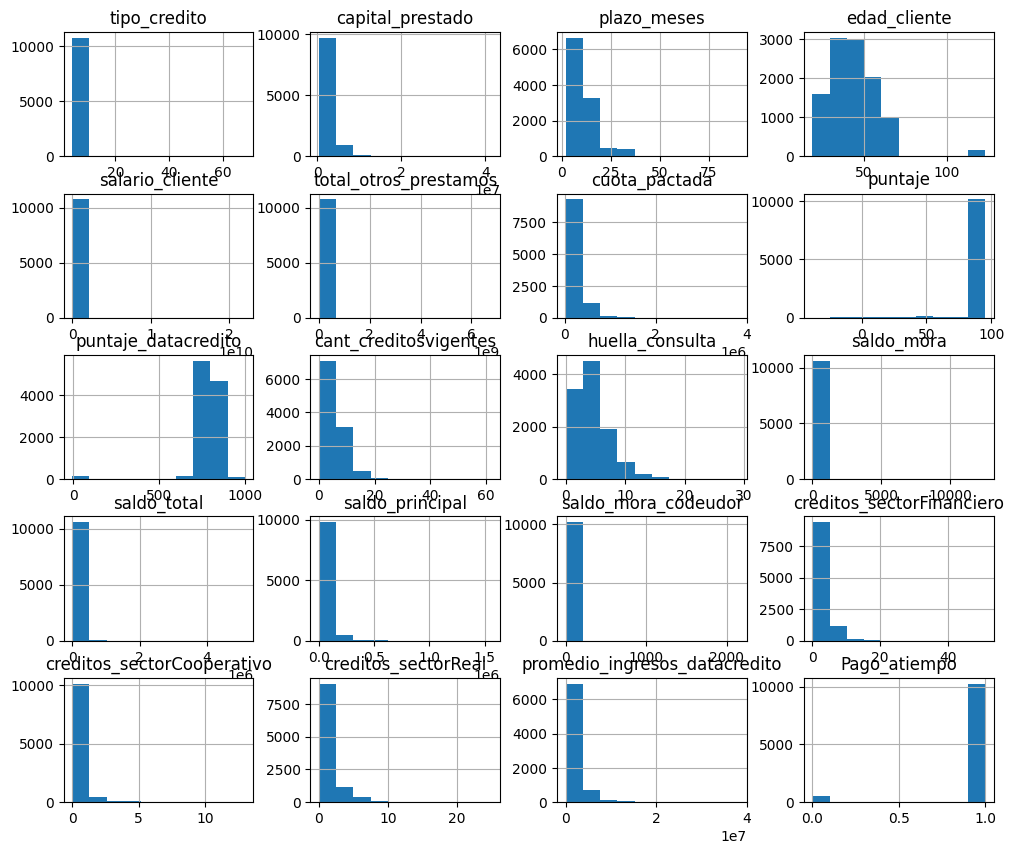

In [ ]:
df.hist(figsize=(12,10))
plt.show()

Las variables financieras presentan distribución asimétrica positiva, lo cual indica presencia de clientes con valores extremos significativamente mayores al promedio.

La mayoría de clientes no presenta mora ni deuda activa significativa.

El perfil demográfico predominante corresponde a adultos en edad laboral activa.

existen registros posiblemente erróneos o mal escalados.

La variable objetivo presenta un fuerte desbalance de clases, lo cual deberá considerarse durante el entrenamiento del modelo mediante técnicas como oversampling, undersampling o ajuste de pesos.

In [18]:
columnas_a_eliminar = [
    "fecha_prestamo"  # se usará luego transformada
]

df = df.drop(columns=columnas_a_eliminar)

df.columns

Index(['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente',
       'tipo_laboral', 'salario_cliente', 'total_otros_prestamos',
       'cuota_pactada', 'puntaje', 'puntaje_datacredito',
       'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total',
       'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero',
       'creditos_sectorCooperativo', 'creditos_sectorReal',
       'promedio_ingresos_datacredito', 'tendencia_ingresos', 'Pago_atiempo'],
      dtype='object')

Se eliminaron variables que no aportan valor predictivo directo o que requieren transformación previa para ser utilizadas en modelos.

In [19]:
df["tipo_laboral"] = df["tipo_laboral"].astype("category")
df["tipo_credito"] = df["tipo_credito"].astype("category")

In [20]:
df["Pago_atiempo"] = df["Pago_atiempo"].astype("bool")

In [21]:
df.dtypes

tipo_credito                     category
capital_prestado                  float64
plazo_meses                         int64
edad_cliente                        int64
tipo_laboral                     category
salario_cliente                     int64
total_otros_prestamos               int64
cuota_pactada                       int64
puntaje                           float64
puntaje_datacredito               float64
cant_creditosvigentes               int64
huella_consulta                     int64
saldo_mora                        float64
saldo_total                       float64
saldo_principal                   float64
saldo_mora_codeudor               float64
creditos_sectorFinanciero           int64
creditos_sectorCooperativo          int64
creditos_sectorReal                 int64
promedio_ingresos_datacredito     float64
tendencia_ingresos                 object
Pago_atiempo                         bool
dtype: object

Se estandarizaron los tipos de datos para asegurar consistencia estructural y compatibilidad con algoritmos de machine learning

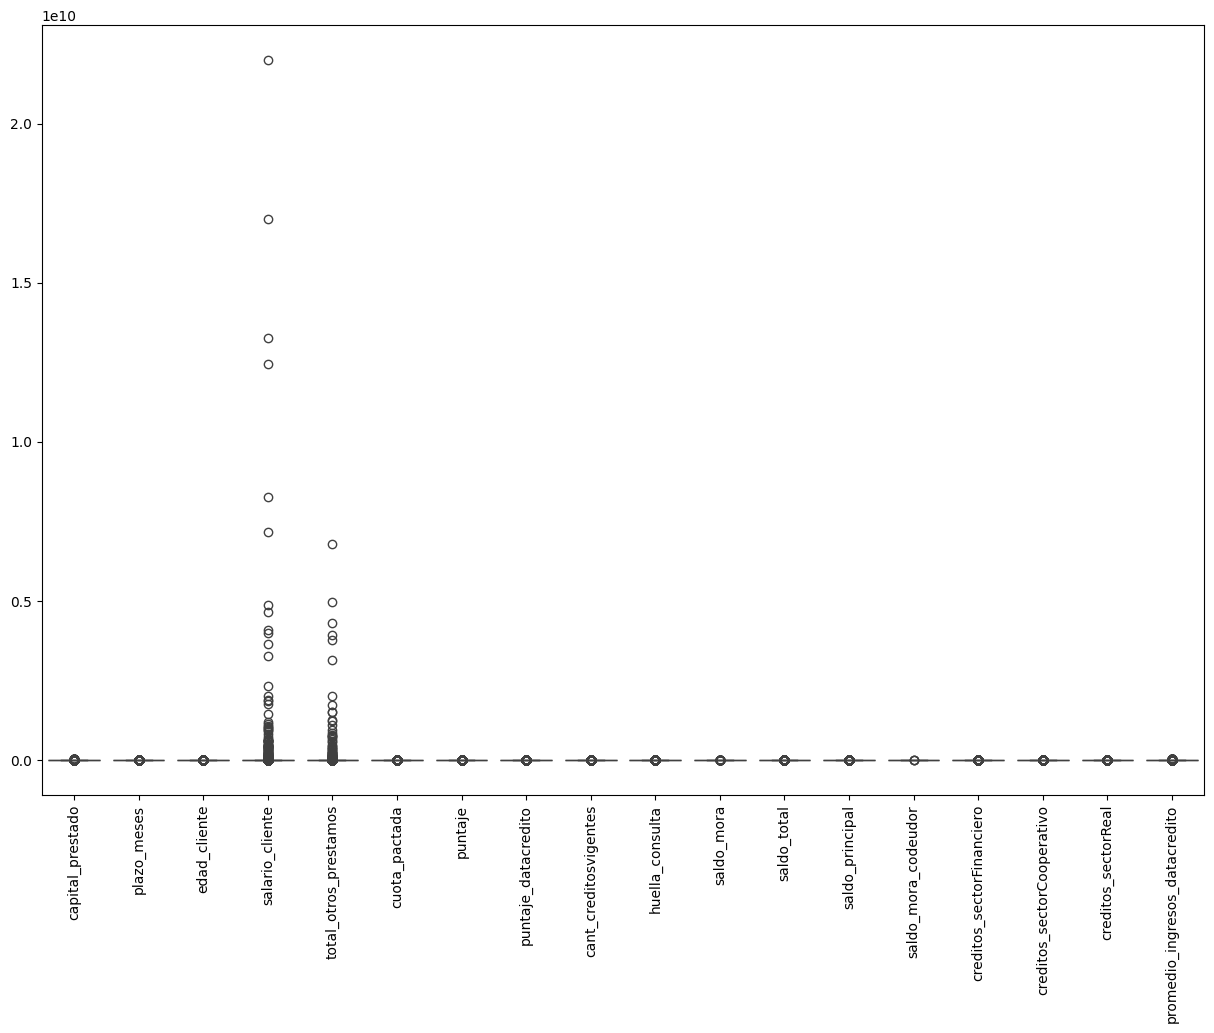

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.show()

In [24]:
df.select_dtypes(include="number").skew()

capital_prestado                  3.723884
plazo_meses                       2.459691
edad_cliente                      1.934399
salario_cliente                  43.776664
total_otros_prestamos            38.463886
cuota_pactada                     3.793301
puntaje                          -4.865607
puntaje_datacredito              -5.644513
cant_creditosvigentes             1.797738
huella_consulta                   1.487102
saldo_mora                       40.568483
saldo_total                      20.197674
saldo_principal                   5.050172
saldo_mora_codeudor              94.971504
creditos_sectorFinanciero         2.703071
creditos_sectorCooperativo        4.218667
creditos_sectorReal               3.164866
promedio_ingresos_datacredito     4.280151
dtype: float64

In [25]:
df.select_dtypes(include="number").kurtosis()

capital_prestado                   35.318092
plazo_meses                         7.780121
edad_cliente                        7.868936
salario_cliente                  2211.230120
total_otros_prestamos            1719.280871
cuota_pactada                      26.650757
puntaje                            24.081011
puntaje_datacredito                39.437798
cant_creditosvigentes               8.623346
huella_consulta                     3.998984
saldo_mora                       1845.712807
saldo_total                       789.166702
saldo_principal                    51.063839
saldo_mora_codeudor              9279.824860
creditos_sectorFinanciero          19.441771
creditos_sectorCooperativo         29.351455
creditos_sectorReal                18.187208
promedio_ingresos_datacredito      32.770749
dtype: float64

Análisis estadístico avanzado:

- Varias variables presentan alta asimetría positiva, indicando presencia de valores extremos.
- Variables financieras muestran curtosis elevada, lo que confirma la existencia de outliers significativos.
- Las variables de puntaje presentan asimetría negativa, indicando predominio de valores altos.
- Las distribuciones no siguen una forma gaussiana, lo que sugiere necesidad de transformaciones antes del modelado.

Conclusión:
Será necesario aplicar técnicas de transformación como logaritmos, escalamiento robusto o winsorización para estabilizar distribuciones.
""")

In [31]:
df["tipo_laboral"].value_counts()

tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64

<Axes: xlabel='tipo_laboral', ylabel='count'>

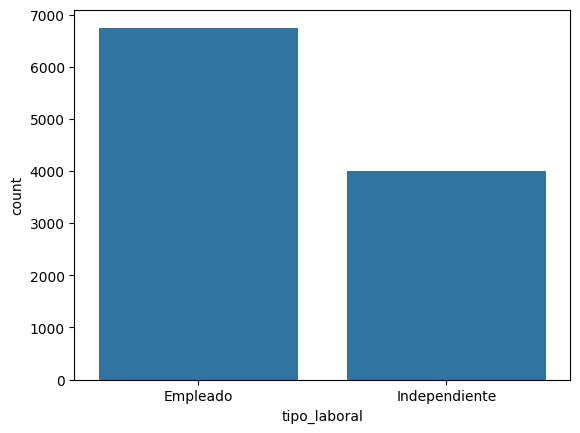

In [30]:
sns.countplot(x="tipo_laboral", data=df)

<Axes: xlabel='Pago_atiempo', ylabel='puntaje'>

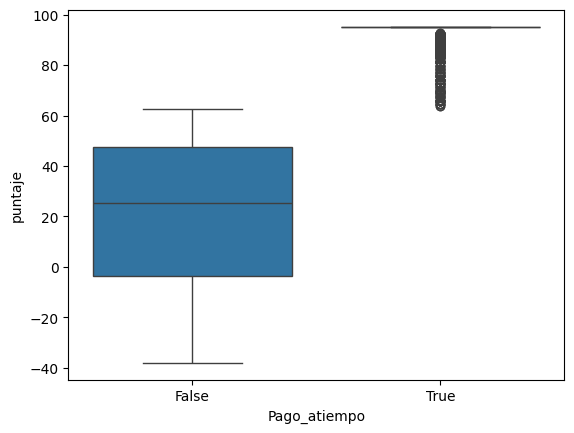

In [29]:
sns.boxplot(x="Pago_atiempo", y="puntaje", data=df)

Los clientes con mayor puntaje presentan mayor probabilidad de pago oportuno.

In [32]:
pd.pivot_table(df, values="capital_prestado", index="Pago_atiempo", aggfunc="mean")

,capital_prestado
Pago_atiempo,
False,2.781774e+06
True,2.416996e+06


Se observan diferencias en el capital promedio entre clientes cumplidos y morosos.

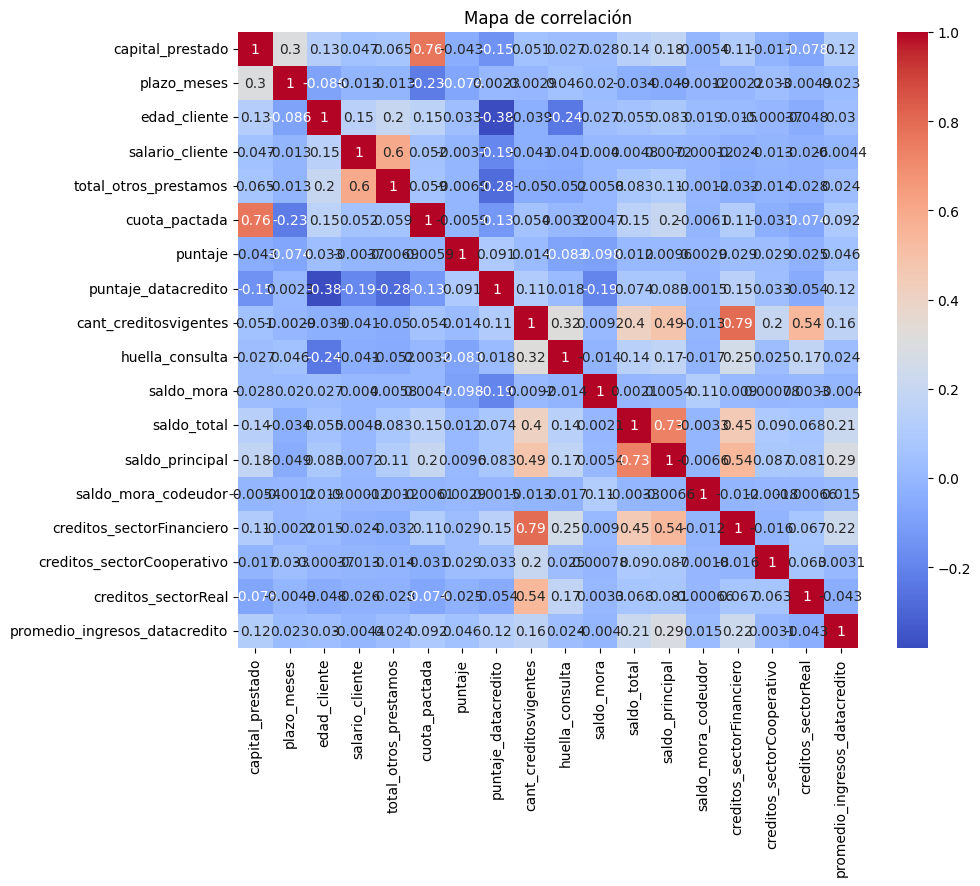

In [36]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de correlación")
plt.show()

El puntaje crediticio es el principal predictor del comportamiento de pago del cliente.

Variables relacionadas con endeudamiento presentan correlación moderada con el comportamiento de pago, indicando que el nivel de deuda influye en la probabilidad de cumplimiento.

Algunas variables demográficas presentan baja relación directa con la variable objetivo, lo que sugiere menor relevancia predictiva individual.

Se identificó multicolinealidad entre variables financieras relacionadas con saldos, lo que sugiere que algunas podrían eliminarse para evitar redundancia en el modelo.

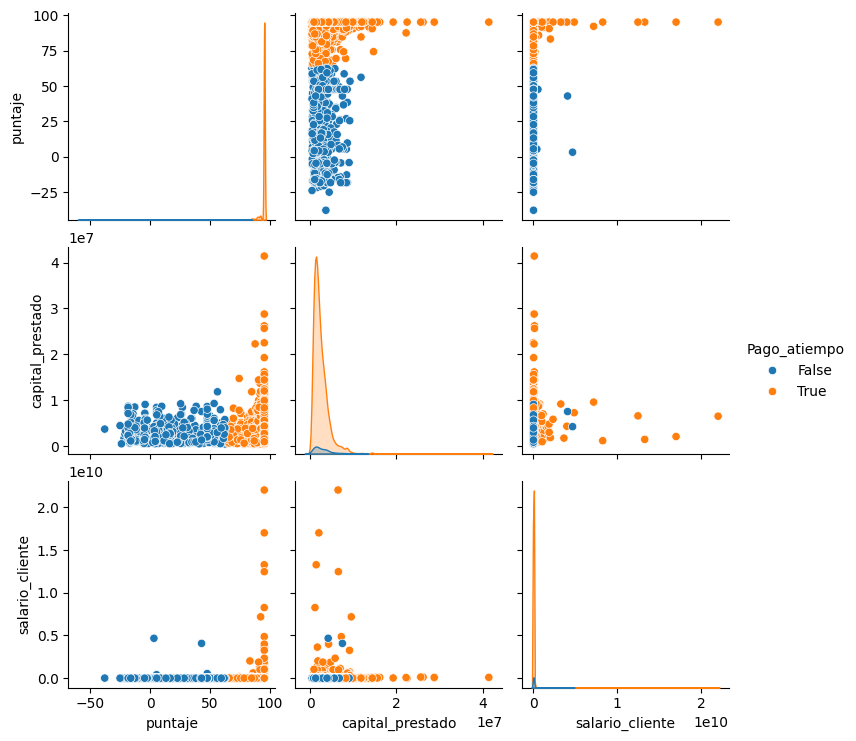

In [35]:
sns.pairplot(df[["puntaje","capital_prestado","salario_cliente","Pago_atiempo"]],
             hue="Pago_atiempo")

Existe una relación directa fuerte entre el puntaje crediticio y el cumplimiento de pago.

No existe relación lineal clara entre salario y capital prestado.

Se identifican outliers significativos que podrían afectar el desempeño del modelo y deberán tratarse antes del entrenamiento.

el dataset tiene señal predictiva real

El modelo no podrá basarse en una sola variable, sino en la combinación de varias.

<Axes: xlabel='salario_cliente', ylabel='capital_prestado'>

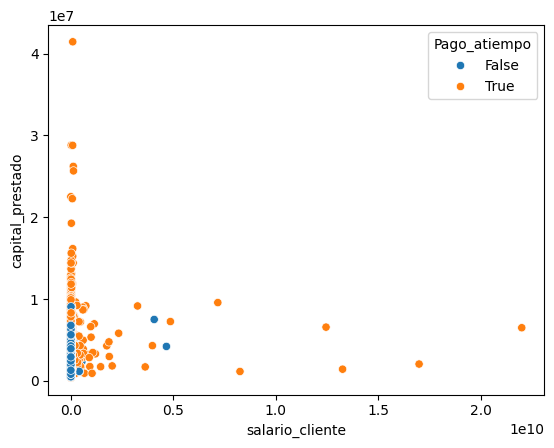

In [37]:
sns.scatterplot(x="salario_cliente", y="capital_prestado",
                hue="Pago_atiempo", data=df)

Se identifican patrones claros donde combinaciones de ingresos altos y puntajes elevados se asocian con mayor probabilidad de pago.

Reglas de validación propuestas:

- Puntaje no debe ser negativo
- Salario debe ser menor a un umbral máximo realista
- Capital prestado debe ser positivo
- Edad debe estar entre 18 y 90

Transformaciones sugeridas:

- Escalamiento de variables financieras
- Log transform en variables altamente sesgadas
- Imputación de valores faltantes
- Balanceo de variable objetivo

In [38]:
df["ratio_deuda_ingreso"] = df["saldo_total"] / df["salario_cliente"]